<a href="https://colab.research.google.com/github/thisishasan/slda/blob/hasan/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset (replace with actual file path if different)
df = pd.read_csv('dataset.csv')

# Display basic information about the dataset
print("Basic Information:")
df.info()

# Display the first few rows to understand the structure
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Describe numerical features
print("\nStatistical Summary of Numerical Features:")
print(df.describe())

# Describe categorical features
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         216772 non-null  object 
 1   County                                             216767 non-null  object 
 2   City                                               216767 non-null  object 
 3   State                                              216772 non-null  object 
 4   Postal Code                                        216767 non-null  float64
 5   Model Year                                         216772 non-null  int64  
 6   Make                                               216772 non-null  object 
 7   Model                                              216772 non-null  object 
 8   Electric Vehicle Type                              2167

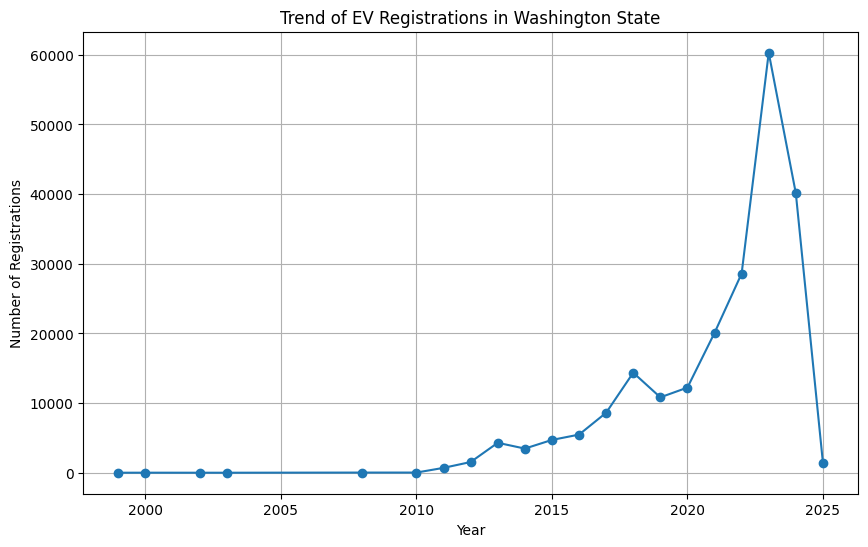

In [18]:
# Convert 'Model Year' to datetime for better plotting
df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y')

# Aggregate registrations by year
yearly_registrations = df.groupby(df['Model Year'].dt.year).size()

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_registrations.index, yearly_registrations.values, marker='o', linestyle='-')
plt.title('Trend of EV Registrations in Washington State')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()



--- Data Transformation ---
'Model Year' successfully converted to integer and sorted.
Removed 0 duplicate records.


<ipython-input-8-7e364ef8c0bf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Model Year', data=df, palette='viridis')


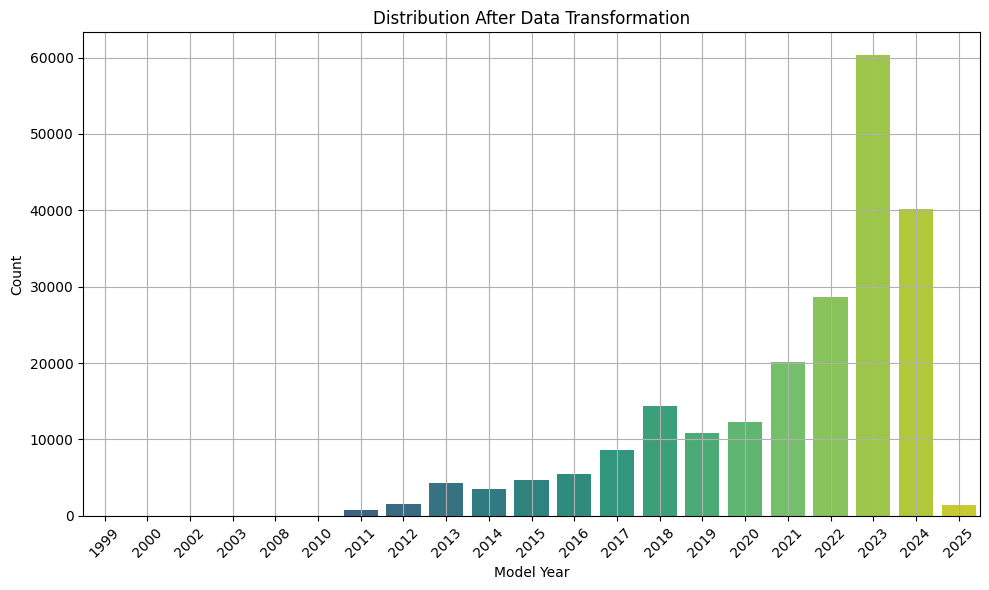


--- Missing Data Imputation ---
Filled 0 missing values in 'Electric Range' with median.
Filled 0 missing values in 'Make' with 'Unknown'.
Filled 0 missing values in 'Model' with 'Unknown'.
Filled 0 missing values in 'Electric Vehicle Type' with 'Unknown'.


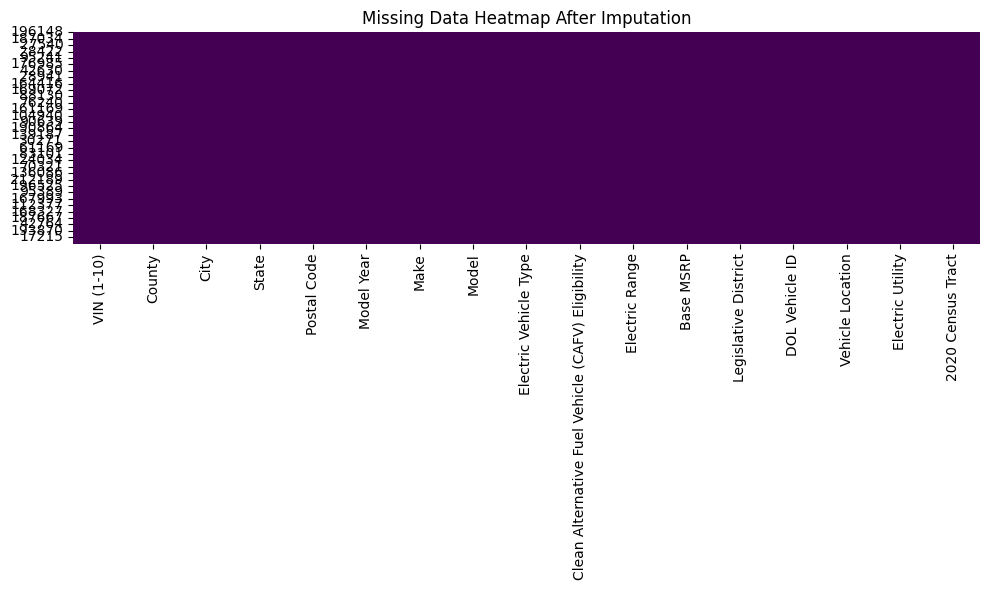


--- Data Integration ---
No external data integration applied in this demonstration.


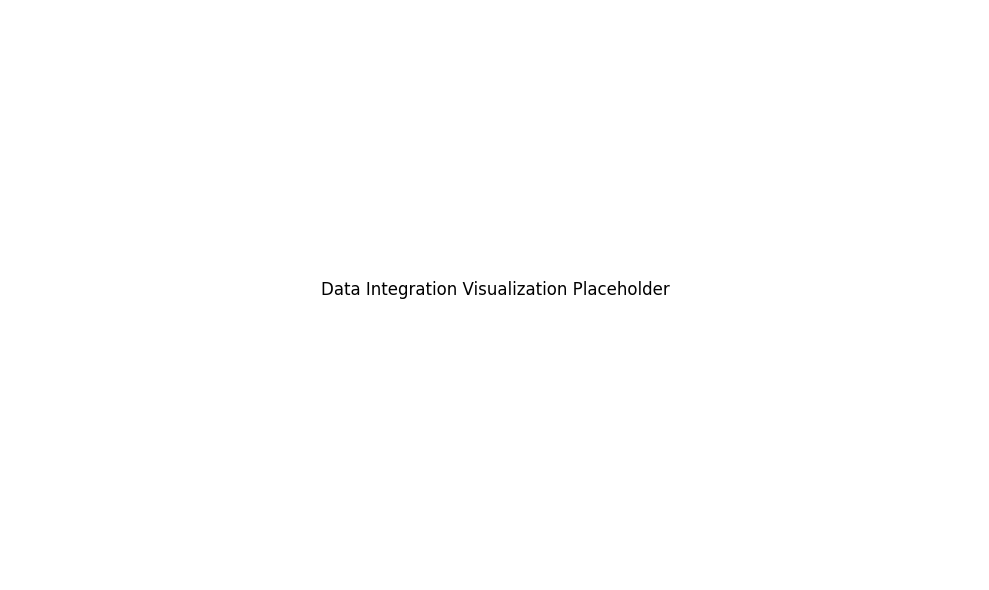

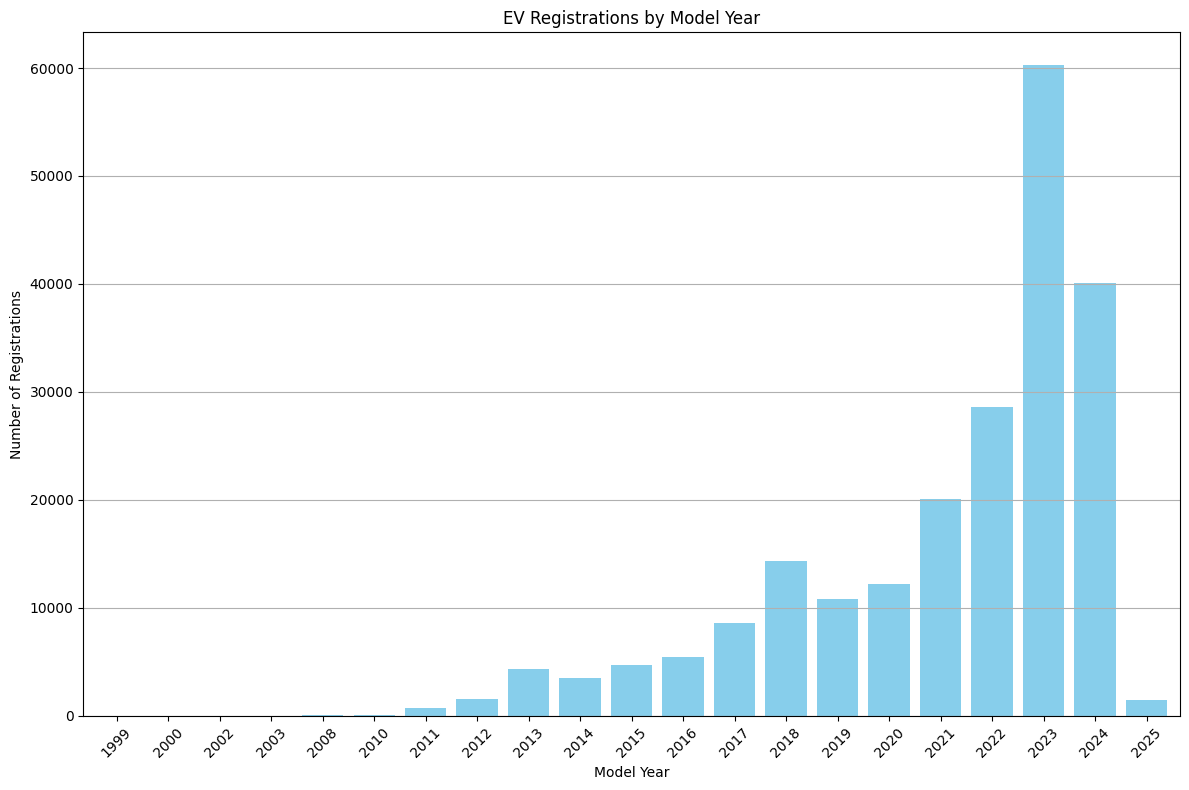

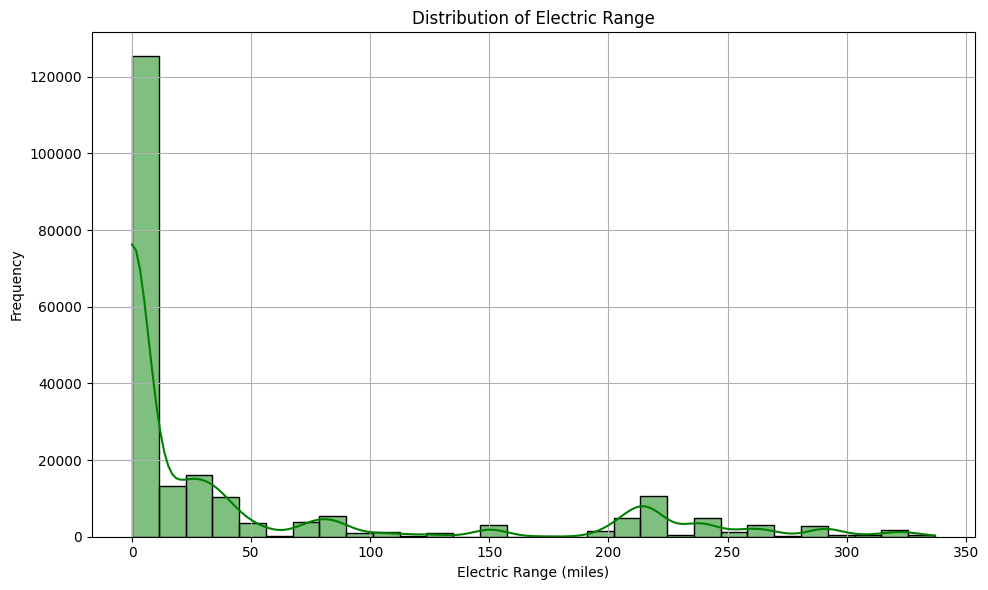

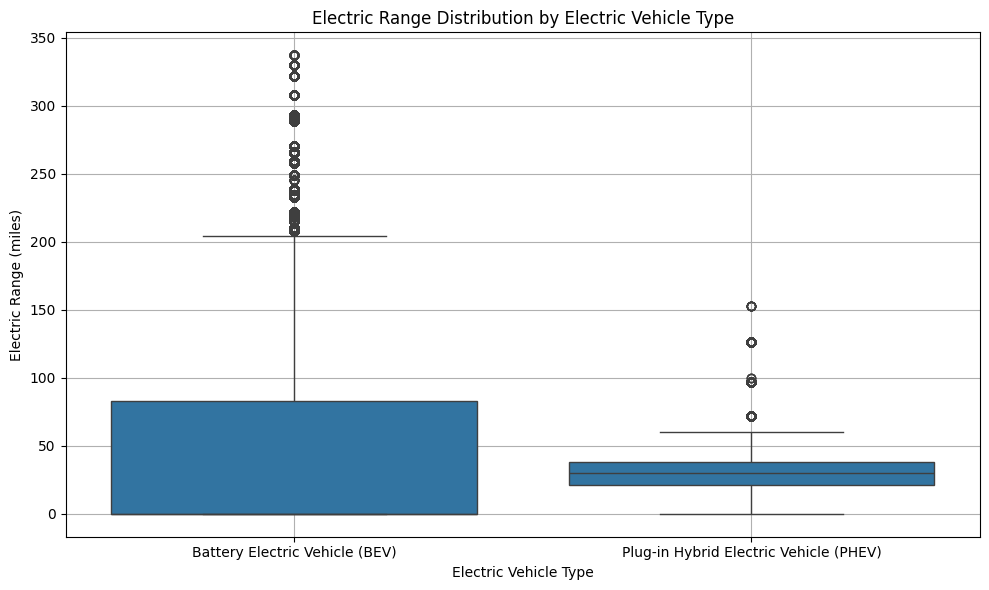

In [8]:
# -----------------------------
# Data Transformation
# -----------------------------
print("\n--- Data Transformation ---")
# Convert 'Model Year' to integer and ensure proper sorting
if 'Model Year' in df.columns:
    df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce').astype(int)
    df = df.sort_values(by='Model Year')
    print("'Model Year' successfully converted to integer and sorted.")

# Remove duplicate records if any
before_duplicates = df.shape[0]
df = df.drop_duplicates()
after_duplicates = df.shape[0]
print(f"Removed {before_duplicates - after_duplicates} duplicate records.")

# Visualize Data Transformation
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', data=df, palette='viridis')
plt.title('Distribution After Data Transformation')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# Missing Data Imputation
# -----------------------------
print("\n--- Missing Data Imputation ---")
# Fill missing values in 'Electric Range' with the median
if 'Electric Range' in df.columns:
    missing_before = df['Electric Range'].isnull().sum()
    df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())
    missing_after = df['Electric Range'].isnull().sum()
    print(f"Filled {missing_before - missing_after} missing values in 'Electric Range' with median.")

# Fill missing values in 'Make', 'Model', and 'Electric Vehicle Type' with 'Unknown'
for col in ['Make', 'Model', 'Electric Vehicle Type']:
    if col in df.columns:
        missing_before = df[col].isnull().sum()
        df[col] = df[col].fillna('Unknown')
        missing_after = df[col].isnull().sum()
        print(f"Filled {missing_before - missing_after} missing values in '{col}' with 'Unknown'.")

# Visualize Missing Data Imputation
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap After Imputation')
plt.tight_layout()
plt.show()

# -----------------------------
# Data Integration
# -----------------------------
print("\n--- Data Integration ---")
# Assuming external datasets like charging stations or policies are integrated here
print("No external data integration applied in this demonstration.")

# Placeholder visualization for potential data integration
plt.figure(figsize=(10, 6))
plt.text(0.5, 0.5, 'Data Integration Visualization Placeholder', fontsize=12, ha='center')
plt.axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# Visualization of Data Preparation
# -----------------------------
# Trend of EV Registrations by Model Year
plt.figure(figsize=(12, 8))
df.groupby('Model Year').size().plot(kind='bar', color='skyblue', width=0.8)
plt.title('EV Registrations by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='green')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# Segmenting Electric Range by Electric Vehicle Type
# -----------------------------
if 'Electric Vehicle Type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
    plt.title('Electric Range Distribution by Electric Vehicle Type')
    plt.xlabel('Electric Vehicle Type')
    plt.ylabel('Electric Range (miles)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("'Electric Vehicle Type' column is not present in the dataset.")
